<a href="https://colab.research.google.com/github/jorgee111/dataton/blob/main/prueba_Dataton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Importamos la librería NumPy, que se usa principalmente para trabajar con arreglos (arrays) y operaciones matemáticas de alto rendimiento.
import pandas as pd # Importamos Pandas, una librería fundamental para la manipulación y análisis de datos, en especial para trabajar con estructuras de datos como DataFrames.
import matplotlib.pyplot as plt # Importamos matplotlib.pyplot, que se utiliza para crear gráficos y visualizaciones en 2D de forma fácil.
import seaborn as sns # Importamos seaborn, una librería de visualización de datos en Python.
from sklearn import metrics  # Importa el módulo 'metrics' de scikit-learn para evaluar el rendimiento del modelo.
from sklearn.metrics import accuracy_score, roc_curve, auc # Importa funciones específicas para calcular la precisión, la curva ROC y el AUC.

In [ ]:
#https://drive.google.com/file/d/1BvqkvyltFAYPJZvhRbnpF63ZGmkPTlN4/view?usp=drive_link
df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=16nCIJ5xXYYSGK8I7eEXPgboOh9mEkhc9")
df.head() #Con esta instrucción podemos ver la cabecera de nuestros datos

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,id
0,2020S000038,01/01/2020,22:35:00,CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO,3,9.0,MONCLOA-ARAVACA,Caída,Despejado,Ciclomotor,Conductor,De 21 a 24 años,Mujer,2,432586.0,4479981.0,N,NaN,1
1,2020S000067,01/01/2020,18:40:00,PLAZA. BEATA MARIA ANA DE JESUS / PASEO. DELICIAS,9,2.0,ARGANZUELA,Caída,NaN,Motocicleta hasta 125cc,Conductor,De 35 a 39 años,Hombre,3,441035.0,4471710.0,N,NaN,2
2,2020S000021,01/01/2020,9:30:00,"CALL. LUIS BUÑUEL, 2",2,13.0,PUENTE DE VALLECAS,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 18 a 20 años,Hombre,3,445287.0,4470975.0,N,NaN,3
3,2020S000047,01/01/2020,12:39:00,"CALL. ANSAR, 82",82,10.0,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,Conductor,De 18 a 20 años,Hombre,3,436922.0,4472874.0,N,NaN,4
4,2020S000043,01/01/2020,14:14:00,"AUTOV. M-30, KM 11,800 CALZADA 2",+01200E,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,3,442032.0,4470533.0,N,NaN,5


In [3]:
import pandas as pd
#https://drive.google.com/file/d/1OeP-1Iig6bm0uSF4ifMHJaLBOJSz-Mzn/view?usp=drive_link
# Cargar los datasets proporcionados 1OeP-1Iig6bm0uSF4ifMHJaLBOJSz-Mzn



# Enlace actualizado al archivo compartido
test_path = 'https://drive.google.com/uc?export=download&id=1OeP-1Iig6bm0uSF4ifMHJaLBOJSz-Mzn'

# Leer el archivo CSV
try:
    df_test = pd.read_csv(test_path, low_memory=False)
    print(df_test.head())
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

train_path = 'https://drive.google.com/uc?export=download&id=16nCIJ5xXYYSGK8I7eEXPgboOh9mEkhc9'


# Leer los archivos CSV
df_train = pd.read_csv(train_path)


# Mostrar una vista rápida de los datos
df_train.head(), df_test.head()

  num_expediente       fecha      hora                         localizacion  \
0    2022S000029  01/01/2022   6:25:00                  AVDA. FILIPINAS, 50   
1    2024S000070  01/01/2024  22:02:00        CALL. MARSELLA / CALL. ZURICH   
2    2020S002443  01/02/2020  21:05:00  AVDA. CONCHA ESPINA / CALL. SERRANO   
3    2021S001350  01/02/2021  20:48:00                CALL. COSTA BRAVA, 23   
4    2022S002196  01/02/2022   1:10:00                     PASEO. PRADO, 22   

  numero  cod_distrito             distrito                tipo_accidente  \
0     50           7.0             CHAMBERÍ                       Alcance   
1     29          20.0  SAN BLAS-CANILLEJAS       Colisión fronto-lateral   
2     49           5.0            CHAMARTÍN                         Caída   
3     23           8.0  FUENCARRAL-EL PARDO  Choque contra obstáculo fijo   
4     22           1.0               CENTRO       Colisión fronto-lateral   

  estado_meteorológico        tipo_vehiculo tipo_persona      

<ipython-input-3-180d68c6a2a4>:21: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train_path)


(  num_expediente       fecha      hora  \
 0    2020S000038  01/01/2020  22:35:00   
 1    2020S000067  01/01/2020  18:40:00   
 2    2020S000021  01/01/2020   9:30:00   
 3    2020S000047  01/01/2020  12:39:00   
 4    2020S000043  01/01/2020  14:14:00   
 
                                         localizacion   numero  cod_distrito  \
 0  CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO        3           9.0   
 1  PLAZA. BEATA MARIA ANA DE JESUS / PASEO. DELICIAS        9           2.0   
 2                               CALL. LUIS BUÑUEL, 2        2          13.0   
 3                                    CALL. ANSAR, 82       82          10.0   
 4                   AUTOV. M-30, KM 11,800 CALZADA 2  +01200E          13.0   
 
              distrito                tipo_accidente estado_meteorológico  \
 0     MONCLOA-ARAVACA                         Caída            Despejado   
 1          ARGANZUELA                         Caída                  NaN   
 2  PUENTE DE VALLECAS  Cho

In [4]:
# Comenzamos analizando valores nulos y tipos de datos en el dataset de entrenamiento
train_info = df_train.info()
null_values_train = df_train.isnull().sum()

# Análisis de valores únicos para detectar posibles inconsistencias en las variables categóricas
unique_values_train = df_train.nunique()

# Resumen inicial para el dataset de prueba
test_info = df_test.info()
null_values_test = df_test.isnull().sum()

# Presentamos un resumen general de los datos
train_info, null_values_train, unique_values_train, test_info, null_values_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90909 entries, 0 to 90908
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_expediente        90909 non-null  object 
 1   fecha                 90909 non-null  object 
 2   hora                  90909 non-null  object 
 3   localizacion          90909 non-null  object 
 4   numero                90906 non-null  object 
 5   cod_distrito          90906 non-null  float64
 6   distrito              90906 non-null  object 
 7   tipo_accidente        90907 non-null  object 
 8   estado_meteorológico  88989 non-null  object 
 9   tipo_vehiculo         90782 non-null  object 
 10  tipo_persona          90909 non-null  object 
 11  rango_edad            90909 non-null  object 
 12  sexo                  90909 non-null  object 
 13  lesividad             90909 non-null  int64  
 14  coordenada_x_utm      90888 non-null  object 
 15  coordenada_y_utm   

(None,
 num_expediente              0
 fecha                       0
 hora                        0
 localizacion                0
 numero                      3
 cod_distrito                3
 distrito                    3
 tipo_accidente              2
 estado_meteorológico     1920
 tipo_vehiculo             127
 tipo_persona                0
 rango_edad                  0
 sexo                        0
 lesividad                   0
 coordenada_x_utm           21
 coordenada_y_utm           21
 positiva_alcohol            0
 positiva_droga          90456
 id                          0
 dtype: int64,
 num_expediente          47758
 fecha                    1764
 hora                     1353
 localizacion            28359
 numero                   1929
 cod_distrito               21
 distrito                   21
 tipo_accidente             13
 estado_meteorológico        7
 tipo_vehiculo              35
 tipo_persona                3
 rango_edad                 18
 sexo            

In [5]:
# Limpieza de datos inicial

# Convertir coordenadas a valores numéricos en df_train
df_train['coordenada_x_utm'] = pd.to_numeric(df_train['coordenada_x_utm'], errors='coerce')
df_train['coordenada_y_utm'] = pd.to_numeric(df_train['coordenada_y_utm'], errors='coerce')

# Convertir coordenadas a valores numéricos en df_test
df_test['coordenada_x_utm'] = pd.to_numeric(df_test['coordenada_x_utm'], errors='coerce')
df_test['coordenada_y_utm'] = pd.to_numeric(df_test['coordenada_y_utm'], errors='coerce')

# Rellenar valores faltantes en variables categóricas con 'Desconocido'
categorical_cols = ['estado_meteorológico', 'tipo_vehiculo']
for col in categorical_cols:
    df_train[col].fillna('Desconocido', inplace=True)
    df_test[col].fillna('Desconocido', inplace=True)

# Rellenar valores faltantes en coordenadas con la media
df_train['coordenada_x_utm'].fillna(df_train['coordenada_x_utm'].mean(), inplace=True)
df_train['coordenada_y_utm'].fillna(df_train['coordenada_y_utm'].mean(), inplace=True)
df_test['coordenada_x_utm'].fillna(df_test['coordenada_x_utm'].mean(), inplace=True)
df_test['coordenada_y_utm'].fillna(df_test['coordenada_y_utm'].mean(), inplace=True)

# Rellenar valores faltantes en `positiva_droga` con un valor representativo ('No')
df_train['positiva_droga'].fillna(0, inplace=True)
df_test['positiva_droga'].fillna(0, inplace=True)

# Conversión de fecha y hora en ambos datasets
df_train['fecha'] = pd.to_datetime(df_train['fecha'], format='%d/%m/%Y')
df_train['hora'] = pd.to_datetime(df_train['hora'], format='%H:%M:%S').dt.time
df_test['fecha'] = pd.to_datetime(df_test['fecha'], format='%d/%m/%Y')
df_test['hora'] = pd.to_datetime(df_test['hora'], format='%H:%M:%S').dt.time

# Extraer nuevas características de fecha
for df in [df_train, df_test]:
    df['año'] = df['fecha'].dt.year
    df['mes'] = df['fecha'].dt.month
    df['día_semana'] = df['fecha'].dt.dayofweek  # Lunes=0, Domingo=6

# Verificar cambios
df_train.head(), df_test.head()


(  num_expediente      fecha      hora  \
 0    2020S000038 2020-01-01  22:35:00   
 1    2020S000067 2020-01-01  18:40:00   
 2    2020S000021 2020-01-01  09:30:00   
 3    2020S000047 2020-01-01  12:39:00   
 4    2020S000043 2020-01-01  14:14:00   
 
                                         localizacion   numero  cod_distrito  \
 0  CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO        3           9.0   
 1  PLAZA. BEATA MARIA ANA DE JESUS / PASEO. DELICIAS        9           2.0   
 2                               CALL. LUIS BUÑUEL, 2        2          13.0   
 3                                    CALL. ANSAR, 82       82          10.0   
 4                   AUTOV. M-30, KM 11,800 CALZADA 2  +01200E          13.0   
 
              distrito                tipo_accidente estado_meteorológico  \
 0     MONCLOA-ARAVACA                         Caída            Despejado   
 1          ARGANZUELA                         Caída          Desconocido   
 2  PUENTE DE VALLECAS  Choque co

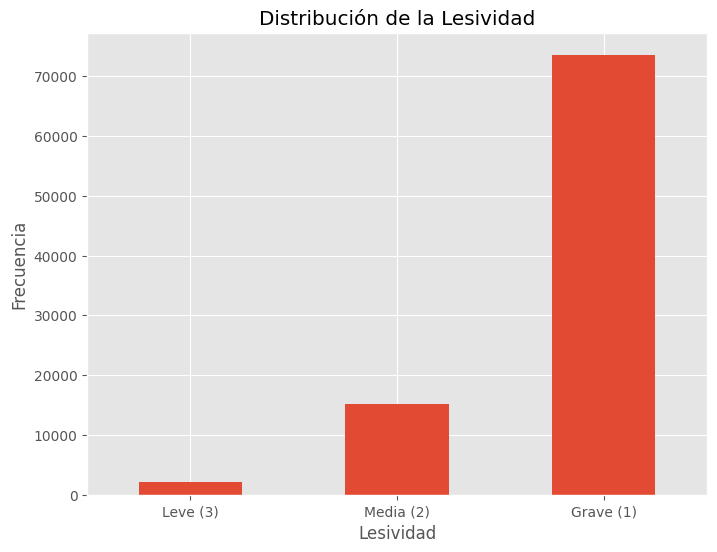

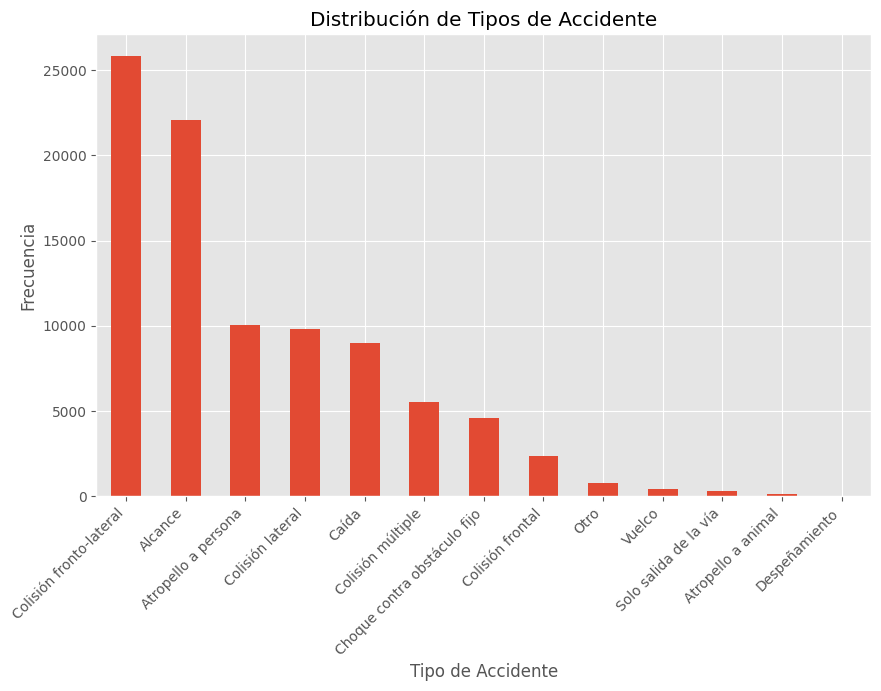

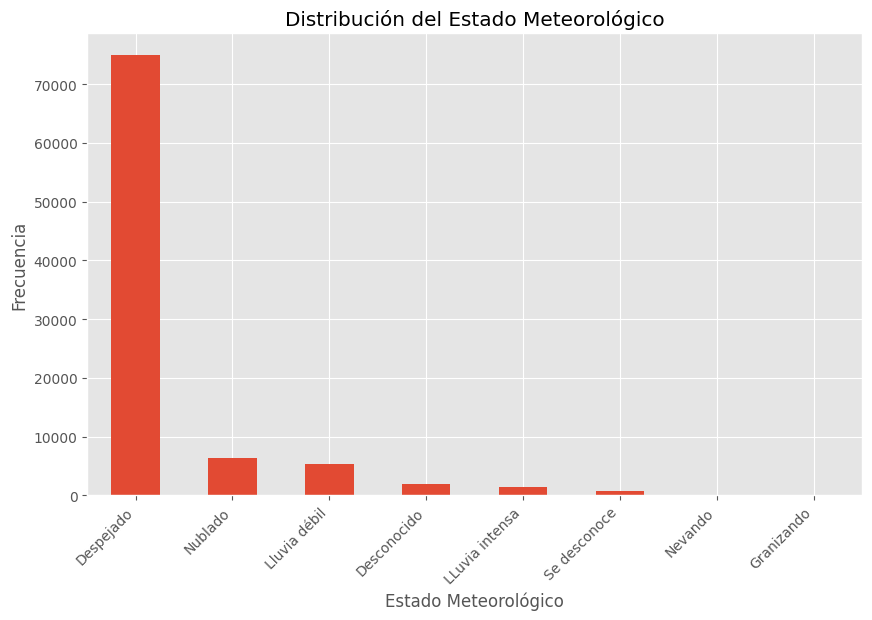

In [6]:
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
plt.style.use('ggplot')

# Visualización de la distribución de la variable objetivo: lesividad
plt.figure(figsize=(8, 6))
df_train['lesividad'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de la Lesividad')
plt.xlabel('Lesividad')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Leve (3)', 'Media (2)', 'Grave (1)'], rotation=0)
plt.show()

# Distribución de tipo de accidente
plt.figure(figsize=(10, 6))
df_train['tipo_accidente'].value_counts().plot(kind='bar')
plt.title('Distribución de Tipos de Accidente')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribución del estado meteorológico
plt.figure(figsize=(10, 6))
df_train['estado_meteorológico'].value_counts().plot(kind='bar')
plt.title('Distribución del Estado Meteorológico')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


<Figure size 1200x600 with 0 Axes>

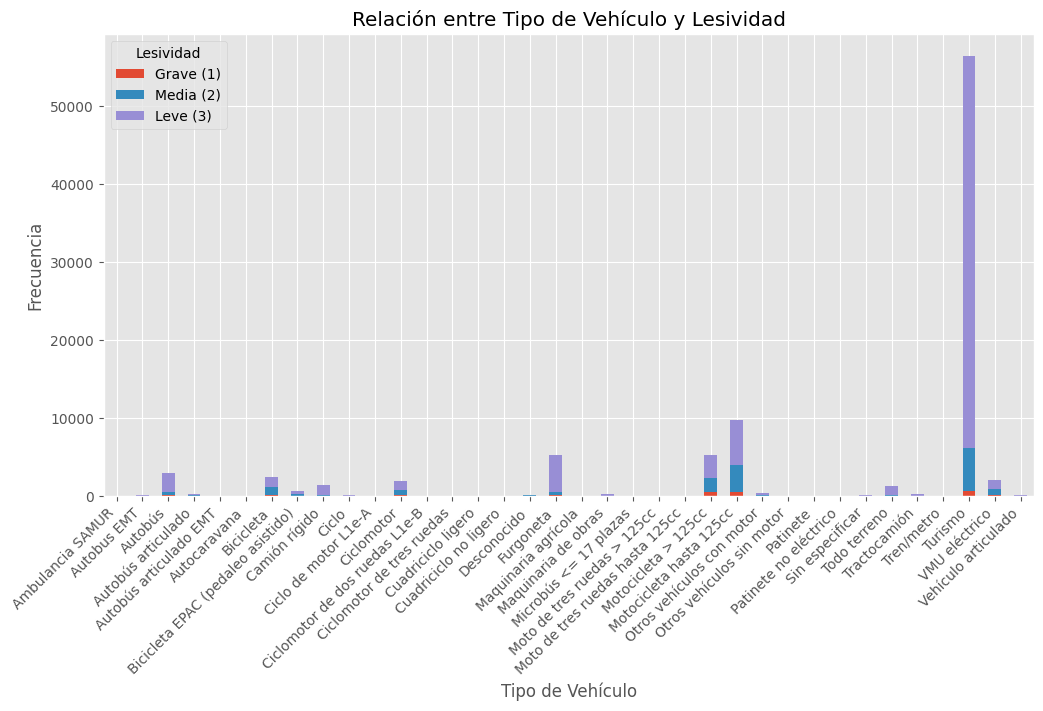

<Figure size 1000x600 with 0 Axes>

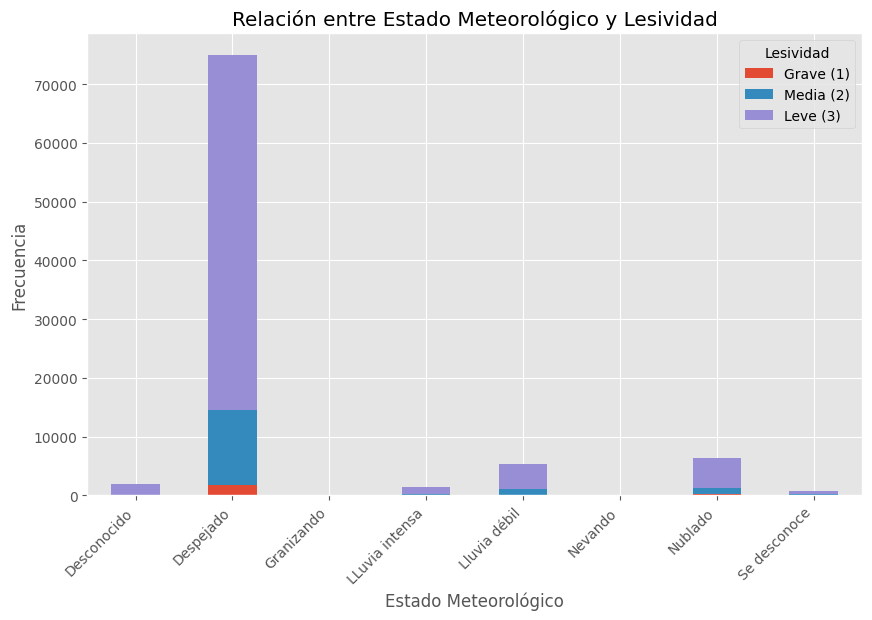

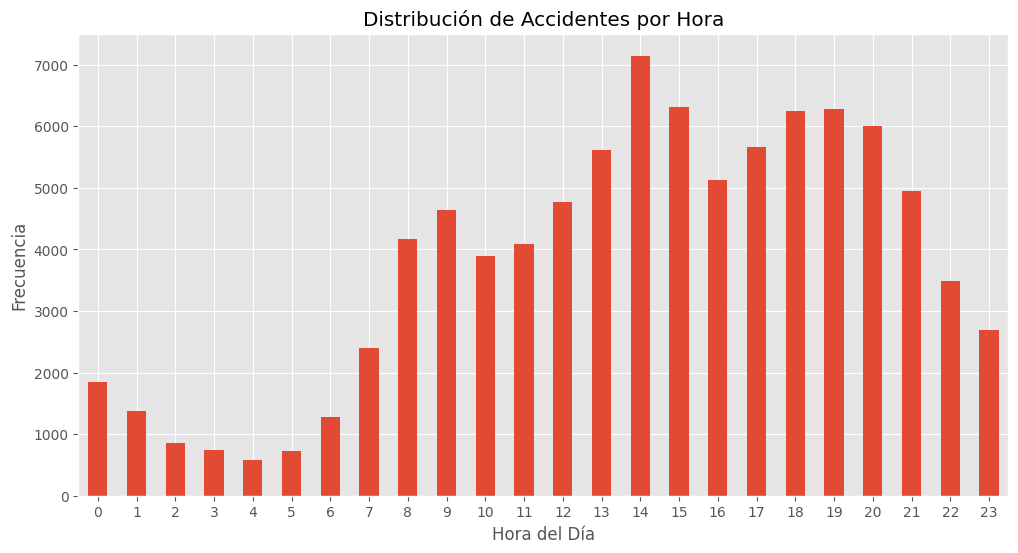

In [7]:
# Relación entre tipo de vehículo y lesividad
plt.figure(figsize=(12, 6))
vehicle_lesividad = df_train.groupby(['tipo_vehiculo', 'lesividad']).size().unstack()
vehicle_lesividad.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relación entre Tipo de Vehículo y Lesividad')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(['Grave (1)', 'Media (2)', 'Leve (3)'], title='Lesividad')
plt.show()

# Relación entre estado meteorológico y lesividad
plt.figure(figsize=(10, 6))
weather_lesividad = df_train.groupby(['estado_meteorológico', 'lesividad']).size().unstack()
weather_lesividad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Estado Meteorológico y Lesividad')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(['Grave (1)', 'Media (2)', 'Leve (3)'], title='Lesividad')
plt.show()

# Análisis por hora: distribución de accidentes
df_train['hora_hh'] = pd.to_datetime(df_train['hora'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(12, 6))
df_train['hora_hh'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Accidentes por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Selección de características relevantes
features = [
    'cod_distrito', 'tipo_accidente', 'estado_meteorológico',
    'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',
    'positiva_alcohol', 'positiva_droga', 'coordenada_x_utm',
    'coordenada_y_utm', 'año', 'mes', 'día_semana', 'hora_hh'
]
target = 'lesividad'

# Codificación de variables categóricas
label_encoders = {}
for col in ['tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    label_encoders[col] = le

# Separación de datos en características (X) y variable objetivo (y)
X = df_train[features]
y = df_train[target]

# División en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verificación de las dimensiones de los conjuntos
X_train.shape, X_val.shape, y_train.shape, y_val.shape


((72727, 15), (18182, 15), (72727,), (18182,))

In [ ]:
df_train.head()

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,id,año,mes,día_semana,hora_hh
0,2020S000038,2020-01-01,22:35:00,CALL. VALLE DE TORANZO / CALL. SIERRA DE PAJAREJO,3,9.0,MONCLOA-ARAVACA,3,1,11,...,2,432586.0,4479981.0,0,0.0,1,2020,1,2,22
1,2020S000067,2020-01-01,18:40:00,PLAZA. BEATA MARIA ANA DE JESUS / PASEO. DELICIAS,9,2.0,ARGANZUELA,3,0,24,...,3,441035.0,4471710.0,0,0.0,2,2020,1,2,18
2,2020S000021,2020-01-01,09:30:00,"CALL. LUIS BUÑUEL, 2",2,13.0,PUENTE DE VALLECAS,4,1,33,...,3,445287.0,4470975.0,0,0.0,3,2020,1,2,9
3,2020S000047,2020-01-01,12:39:00,"CALL. ANSAR, 82",82,10.0,LATINA,4,1,33,...,3,436922.0,4472874.0,0,0.0,4,2020,1,2,12
4,2020S000043,2020-01-01,14:14:00,"AUTOV. M-30, KM 11,800 CALZADA 2",+01200E,13.0,PUENTE DE VALLECAS,0,1,33,...,3,442032.0,4470533.0,0,0.0,5,2020,1,2,14


In [9]:
!pip install pycaret

In [10]:
from pycaret.classification import setup, compare_models

# Preparar el entorno para PyCaret
clf_setup = setup(data=df_train, target='lesividad', preprocess=True)

# Comparar modelos
best_model = compare_models()

KeyboardInterrupt: 

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Asegurarse de que no hay valores faltantes
X_train.fillna(X_train.mean(), inplace=True)
X_val.fillna(X_train.mean(), inplace=True)

# Configurar el modelo Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)

# Definir un rango de hiperparámetros para optimización
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Entrenar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_gbc = grid_search.best_estimator_

# Evaluar en el conjunto de validación
y_pred = best_gbc.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
classification_report_output = classification_report(y_val, y_pred)

# Mostrar resultados
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Precisión en el conjunto de validación:", accuracy)
print("Reporte de clasificación:\n", classification_report_output)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Precisión en el conjunto de validación: 0.8122868771312287
Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.21      0.02      0.04       417
           2       0.48      0.14      0.21      3050
           3       0.83      0.97      0.90     14715

    accuracy                           0.81     18182
   macro avg       0.51      0.38      0.38     18182
weighted avg       0.76      0.81      0.76     18182

